# Lowest Order Edge Element for Maxwell Equations in 3D

This example is to show the lowest order edge element approximation of the electric field of the time harmonic Maxwell equation.
  
\begin{align}
\nabla \times (\mu^{-1}\nabla \times  u) - \omega^2 \varepsilon \, u &= J  \quad  \text{ in } \quad \Omega,  \\
                                  n \times u &= n \times g_D  \quad  \text{ on } \quad \Gamma_D,\\
                    n \times (\mu^{-1}\nabla \times  u) &= n \times g_N  \quad  \text{ on } \quad \Gamma_N.
\end{align}


based on the weak formulation

$$(\mu^{-1}\nabla \times  u, \nabla \times  v) - (\omega^2\varepsilon u,v) = (J,v) - \langle n \times g_N,v \rangle_{\Gamma_N}.$$

**Reference**
- [Finite Element Methods for Maxwell Equations](http://www.math.uci.edu/~chenlong/226/FEMMaxwell.pdf)
- [Programming of Finite Element Methods for Maxwell Equations](http://www.math.uci.edu/~chenlong/226/codeMaxwell.pdf)

**Subroutines**:

    - Maxwell
    - cubeMaxwell
    - femMaxwell3
    - Maxwellfemrate
    
The method is implemented in `Maxwell` subroutine and tested in `cubeMaxwell`. Together with other elements (ND0,ND1,ND2), `femMaxwell3` provides a concise interface to solve Maxwell equation. The ND0 element is tested in `Maxwellfemrate`. This doc is based on `Maxwellfemrate`.    

## Data Structure

Use the function

    [elem2dof,edge,elem2edgeSign] = dof3edge(elem);

to construct the pointer from element index to edge index. Read
<dof3edgedoc.html Dof on Edges in Three Dimensions> for details.


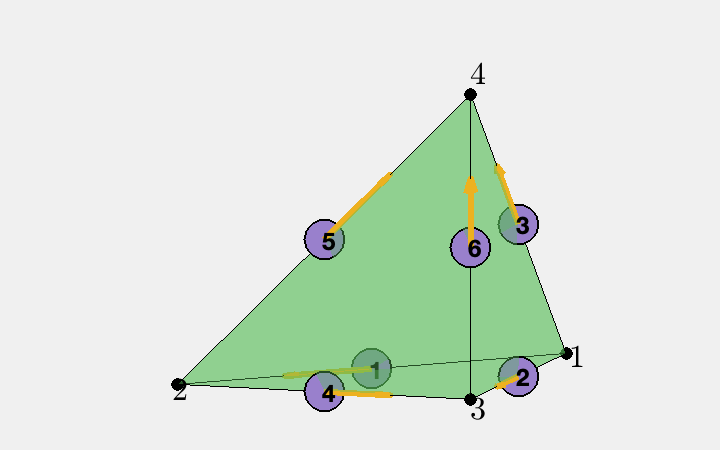

In [5]:
node = [1,0,0; 0,1,0; 0,0,0; 0,0,1];
elem = [1 2 3 4];
localEdge = [1 2; 1 3; 1 4; 2 3; 2 4; 3 4];
set(gcf,'Units','normal'); 
set(gcf,'Position',[0.25,0.25,0.25,0.25]);
showmesh3(node,elem);
view(-72,9);
findnode3(node);
findedge(node,localEdge,'all','vec');

The six dofs associated to edges in a tetrahedron is sorted in the ordering `[1 2; 1 3; 1 4; 2 3; 2 4; 3 4]`. Here `[1 2 3 4]` are local indices of vertices.

Globally we use ascend ordering for each element and thus the orientation of the edge is consistent. No need of `elem2edgeSign`. Read [Simplicial complex in three dimensions](../mesh/sc3doc.html) for more discussion of indexing, ordering and orientation.

## Local Bases
Suppose `[i,j]` is the kth edge and `i<j`. The basis is given by 

$$ \phi _k = \lambda_i\nabla \lambda_j - \lambda_j \nabla \lambda_i,\qquad
   \nabla \times \phi_k = 2\nabla \lambda_i \times \nabla \lambda_j.$$

Inside one tetrahedron, the 6 bases functions along with their curl
corresponding to 6 local edges `[1 2; 1 3; 1 4; 2 3; 2 4; 3 4]` are

$$ \phi_1 = \lambda_1\nabla\lambda_2 - \lambda_2\nabla\lambda_1,\qquad
   \nabla \times \phi_1 = 2\nabla\lambda_1\times \nabla\lambda_2,$$

$$ \phi_2 = \lambda_1\nabla\lambda_3 - \lambda_3\nabla\lambda_1,\qquad
   \nabla \times \phi_2 = 2\nabla\lambda_1\times \nabla\lambda_3,$$

$$ \phi_3 = \lambda_1\nabla\lambda_4 - \lambda_4\nabla\lambda_1,\qquad
   \nabla \times \phi_3 = 2\nabla\lambda_1\times \nabla\lambda_4,$$

$$ \phi_4 = \lambda_2\nabla\lambda_3 - \lambda_3\nabla\lambda_2,\qquad
   \nabla \times \phi_4 = 2\nabla\lambda_2\times \nabla\lambda_3,$$

$$ \phi_5 = \lambda_2\nabla\lambda_4 - \lambda_4\nabla\lambda_2,\qquad
   \nabla \times \phi_5 = 2\nabla\lambda_2\times \nabla\lambda_4,$$

$$ \phi_6 = \lambda_3\nabla\lambda_4 - \lambda_4\nabla\lambda_3,\qquad
   \nabla \times \phi_6 = 2\nabla\lambda_3\times \nabla\lambda_4.$$


## Degree of freedoms

Suppose `[i,j]` is the kth edge and `i<j`. The corresponding degree of freedom is

$$l_k (v) = \int_{e_k} v\cdot t \, {\rm d}s \approx \frac{1}{2}[v(i)+v(j)]\cdot e_{k}.$$

It is dual to the basis $\{\phi_k\}$ in the sense that

$$l_{\ell}(\phi _k) = \delta_{k,\ell}.$$



## Dirichlet boundary condition

Dirichlet boundary conditions. 
#dof:      604, Direct solver    0 
#dof:     4184, Direct solver 0.03 
Conjugate Gradient Method using HX preconditioner 
#dof:    31024,   #nnz:   411904,   iter: 26,   err = 7.0419e-09,   time = 0.54 s
Conjugate Gradient Method using HX preconditioner 
#dof:   238688,   #nnz:  3525680,   iter: 29,   err = 5.6720e-09,   time =  3.5 s
Table: Error
 #Dof        h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

   604   2.500e-01   3.33015e-01   3.96024e-01   7.98367e-02   3.72532e-03
  4184   1.250e-01   1.68028e-01   1.97196e-01   4.02280e-02   5.32169e-04
 31024   6.250e-02   8.42042e-02   9.84691e-02   2.02873e-02   6.87268e-05
238688   3.125e-02   4.21257e-02   4.92119e-02   1.01979e-02   8.65951e-06

Table: CPU time
 #Dof    Assemble     Solve      Error      Mesh    

   604   2.00e-02   0.00e+00   2.00e-02   0.00e+00
  4184   5.00e-02   3.00e-02   7.00e-02   1.00e-02
 31024   3.60e-01   5.40e-01   3.00e-01   5.00e-02
238688   2.95

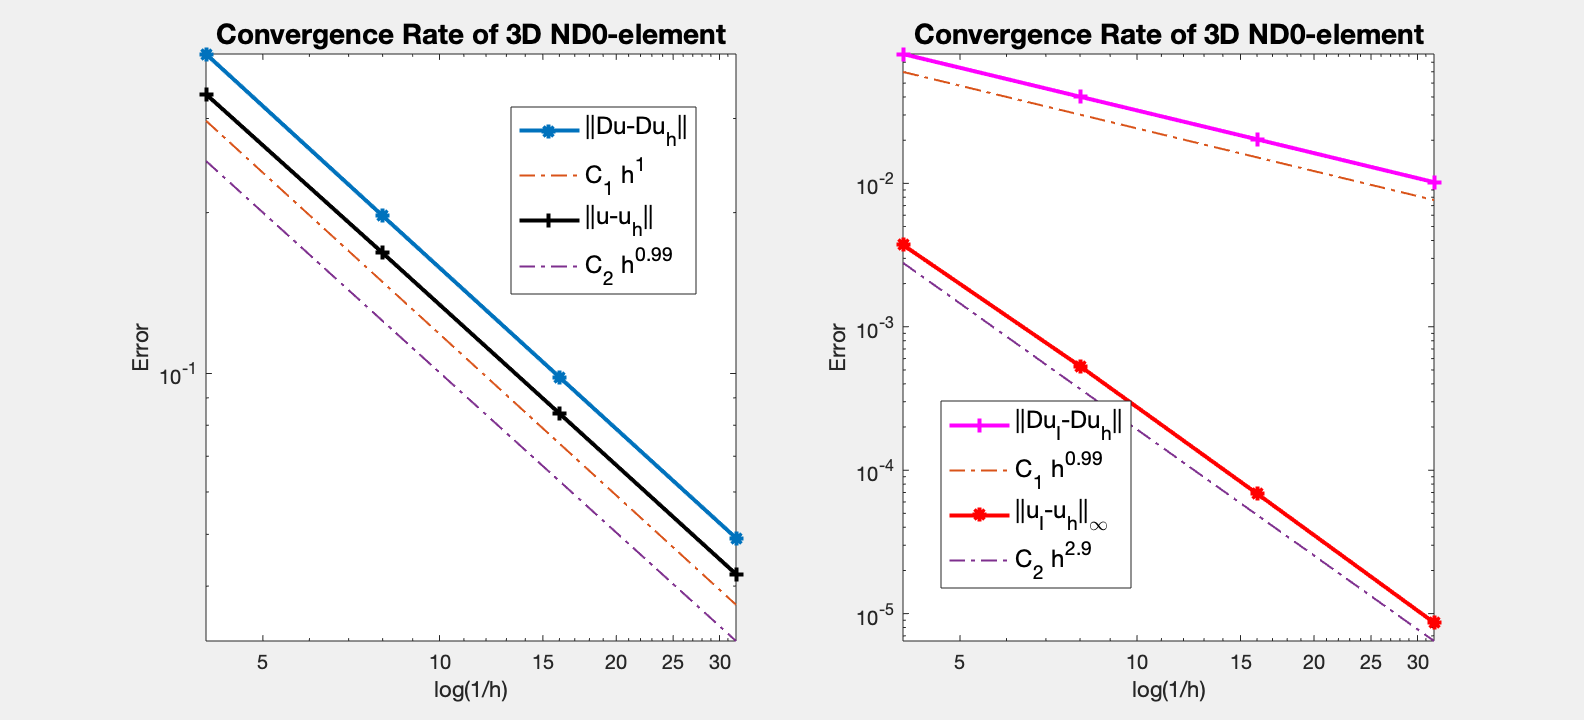

In [6]:
%% Setting
[node,elem] = cubemesh([-1,1,-1,1,-1,1],1);
mesh = struct('node',node,'elem',elem);
option.L0 = 1;
option.maxIt = 4;
option.elemType = 'ND0';
option.printlevel = 1;

%% Dirichlet boundary condition.
fprintf('Dirichlet boundary conditions. \n');    
pde = Maxwelldata2;
bdFlag = setboundary3(node,elem,'Dirichlet');
femMaxwell3(mesh,pde,option);

## Pure Neumann boundary condition

Neumann boundary condition. 
#dof:      604, Direct solver 0.01 
#dof:     4184, Direct solver 0.04 
Conjugate Gradient Method using HX preconditioner 
#dof:    31024,   #nnz:   482608,   iter: 18,   err = 5.5383e-09,   time = 0.41 s
Conjugate Gradient Method using HX preconditioner 
#dof:   238688,   #nnz:  3814496,   iter: 19,   err = 4.7105e-09,   time =  2.6 s
Table: Error
 #Dof        h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

   604   2.500e-01   2.85095e-01   3.91208e-01   1.04607e-01   8.22886e-02
  4184   1.250e-01   1.59317e-01   1.96376e-01   4.52796e-02   2.43444e-02
 31024   6.250e-02   8.27814e-02   9.83230e-02   2.11913e-02   6.66042e-03
238688   3.125e-02   4.19067e-02   4.91846e-02   1.03572e-02   1.72821e-03

Table: CPU time
 #Dof    Assemble     Solve      Error      Mesh    

   604   3.00e-02   1.00e-02   3.00e-02   0.00e+00
  4184   8.00e-02   4.00e-02   7.00e-02   0.00e+00
 31024   3.60e-01   4.10e-01   2.90e-01   5.00e-02
238688   2.86e+0

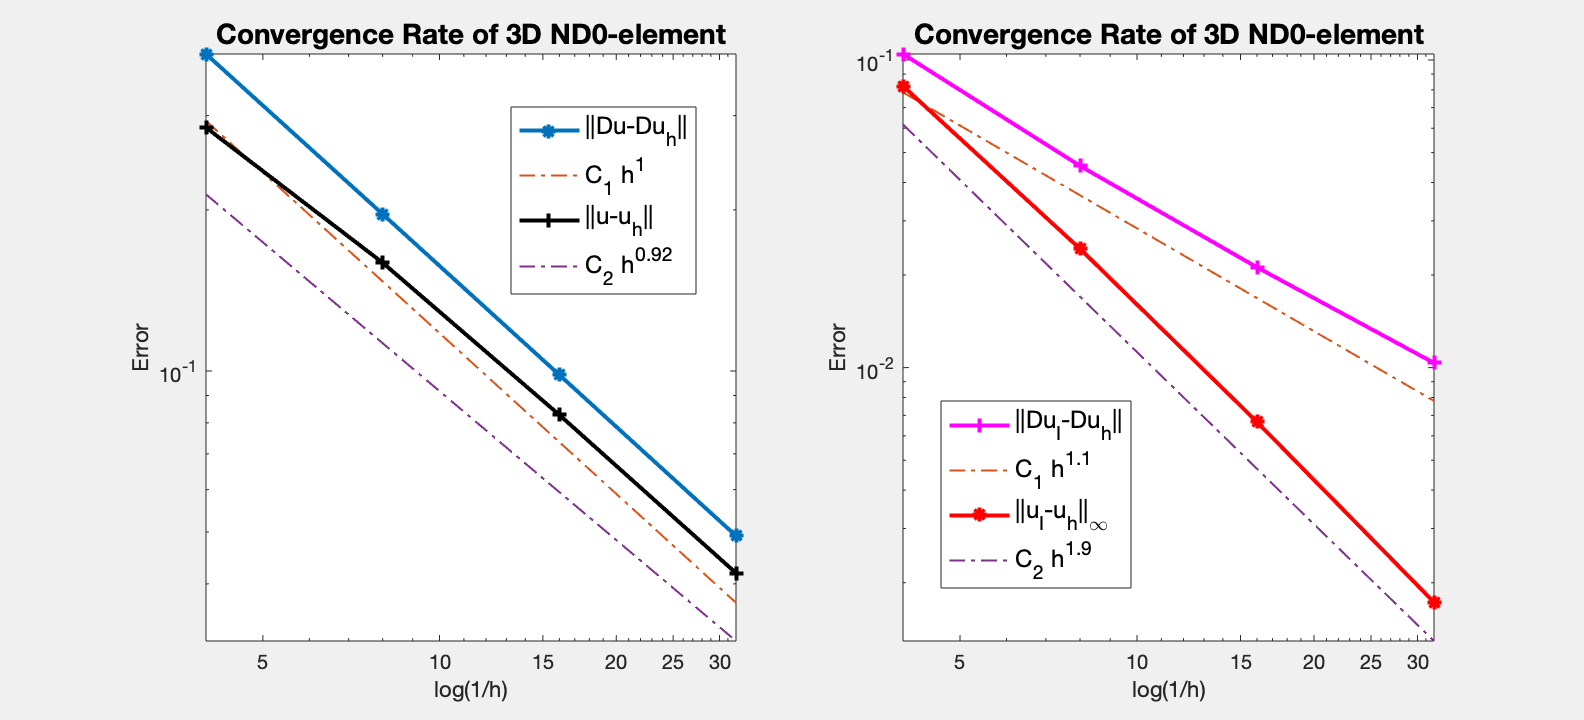

In [8]:
fprintf('Neumann boundary condition. \n');
option.plotflag = 0;
pde = Maxwelldata2;
mesh.bdFlag = setboundary3(node,elem,'Neumann');
femMaxwell3(mesh,pde,option);

## Conclusion 

The optimal rate of convergence of both the H(curl)-norm and L2-norm (1st order) is observed. The 2nd order convergent rate between two discrete functions $\| \nabla \times (u_I - u_h) \|_{\infty}$ is known as superconvergence.

MGCG using HX preconditioner converges uniformly in all cases.